In [1]:
# === Section 1: Imports & Config ===
from ocr_pipeline import PDFtoExcelOCR
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os

PDF_PATH = r"./document.pdf"  
OUTPUT_DIR = r"./output"
TESSERACT_CMD = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
POPLER_BIN_PATH = r"C:\poppler\bin"

# Convert PDF to Images & Visualize

In [2]:
# === Section 2: Convert PDF to Images ===
ocr = PDFtoExcelOCR(
    pdf_path=PDF_PATH,
    output_dir=OUTPUT_DIR,
    tesseract_cmd=TESSERACT_CMD,
    poppler_path=POPLER_BIN_PATH
)
image_paths = ocr.convert_pdf_to_images()
print(f"✅ Converted {len(image_paths)} pages to images.")


✅ Converted 2 pages to images.


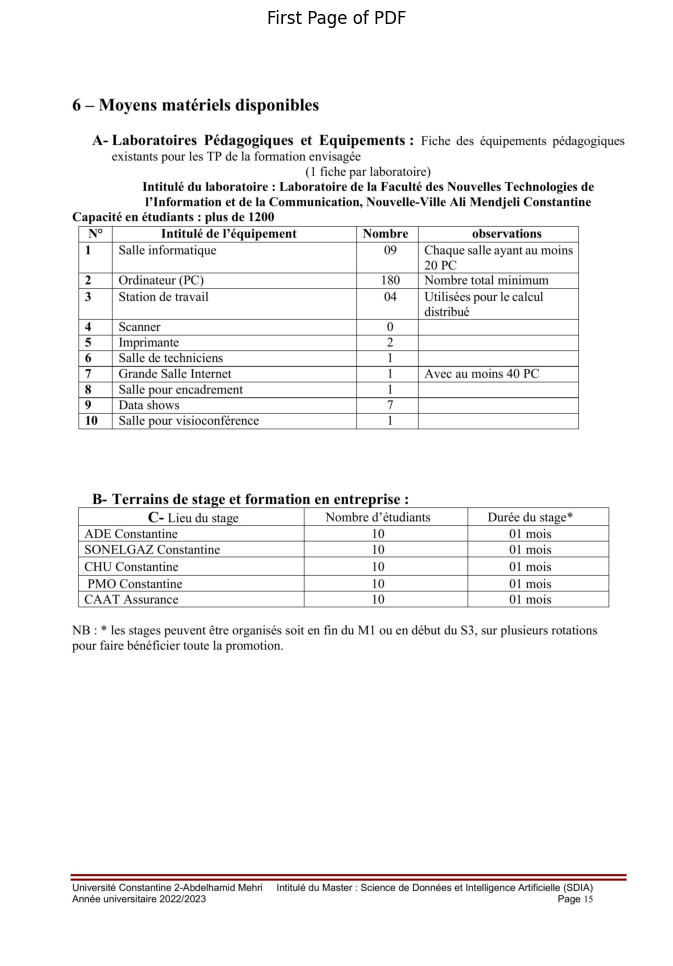

In [3]:
# === Preview First Page ===

first_image = Image.open(image_paths[0])
plt.figure(figsize=(10, 12))
plt.imshow(first_image)
plt.axis("off")
plt.title("First Page of PDF")
plt.show()


# Preprocessing + OCR + Live Preview

In [4]:
# === Section 3: Run structured pipeline ===
content_blocks = ocr.run_pipeline()
print(f"✅ Extracted {len(content_blocks)} content blocks.")



📄 Processing page 1/2
📐 Detected 1 table(s)

📄 Processing page 2/2
📐 Detected 1 table(s)
✅ Extracted 0 content blocks.


In [5]:
print(f"🔍 Total blocks extracted: {len(content_blocks)}")
for i, block in enumerate(content_blocks[:5]):
    print(f"{i+1}. Page: {block.get('page')} | Type: {block.get('type')} | Sample: {str(block.get('content'))[:100]}")


🔍 Total blocks extracted: 0


In [6]:
from matplotlib import pyplot as plt

# Pick first image
test_image_path = image_paths[0]
img = cv2.imread(test_image_path)

# Preprocess
pre = ocr.preprocess_image(test_image_path)

# Detect table areas
table_bboxes = ocr.detect_tables(pre)
print(f"Detected {len(table_bboxes)} tables")

# Remove table areas
text_img = ocr.remove_regions(img, table_bboxes)

# Extract text blocks
blocks = ocr.extract_layout_blocks(text_img)
print(f"🧠 Found {len(blocks)} text blocks")

# Show preview of one
for b in blocks[:3]:
    print(f"Type: {b['type']}, Text: {b['text'][:80]}")


Detected 1 tables
🧠 Found 0 text blocks


In [7]:
table = ocr.extract_table_from_region(img, table_bboxes[0])
print(table)


                                                    0
0                    6 — Moyens matériels disponibles
1   A- Laboratoires Pédagogiques et Equipements : ...
2     existants pour les TP de la formation envisagée
3                           (1 fiche par laboratoire)
4   Intitulé du laboratoire : Laboratoire de la Fa...
5   l’Information et de la Communication, Nouvelle...
6                Capacité en étudiants : plus de 1200
7                                                  ey
8                                               20 PC
9                                           distribué
10                                          4 [Seamer
11                                                  a
12      6 [Salle detechniciens ———SSOSC~—sP dT CT SCS
13             "S| Salle pour encadrement ——S—CS SSCS
14  9 [Daiashws Ss=<“~*~*~‘—s*—“—s*~s—sé~SC‘aS*‘id...
15  10 | Salle pour visioconférencee——=—=S=~sSCi‘i...
16  B- Terrains de stage et formation en entreprise :
17  NB : * les stages peuven

In [8]:
# === Section 4: Export to text file ===
text_output_path = os.path.join(OUTPUT_DIR, "extracted_content.txt")
ocr.export_to_text(content_blocks, text_output_path)

✅ Exported structured content to text: ./output\extracted_content.txt


# test

In [9]:
# === Preview blocks ===
for block in content_blocks:
    print(f"\n📄 Page {block['page']} | Type: {block['type']}")
    
    if block['type'] == 'text':
        print(block['content'][:500])  # show partial text
    elif block['type'] == 'table':
        display(block['content'].head())  # preview table


In [10]:
from pprint import pprint
pprint(content_blocks)


[]


In [11]:
image = cv2.imread("./output/page_1.jpg")
blocks = ocr.extract_layout_blocks(image)

for block in blocks:
    print(block["type"], block["bbox"])



text (238, 253, 267, 299)
text (285, 281, 320, 285)
text (337, 254, 556, 312)
text (577, 252, 836, 299)
text (857, 253, 1171, 312)
text (311, 390, 371, 429)
text (387, 390, 708, 430)
text (736, 389, 1074, 442)
text (1104, 393, 1146, 430)
text (1173, 389, 1498, 442)
text (1519, 402, 1528, 430)
text (1560, 394, 1670, 430)
text (1695, 394, 1759, 430)
text (1785, 394, 2034, 440)
text (2058, 394, 2331, 440)
text (388, 453, 560, 489)
text (574, 465, 665, 499)
text (680, 453, 732, 489)
text (748, 455, 802, 488)
text (819, 453, 863, 489)
text (878, 453, 912, 489)
text (927, 453, 1122, 489)
text (1136, 453, 1330, 499)
text (1123, 512, 1157, 556)
text (1177, 511, 1274, 547)
text (1287, 523, 1352, 557)
text (1366, 511, 1595, 557)
text (503, 569, 659, 604)
text (675, 570, 726, 604)
text (742, 569, 978, 604)
text (996, 580, 1004, 604)
text (1022, 569, 1278, 604)
text (1293, 570, 1340, 604)
text (1355, 570, 1392, 603)
text (1406, 569, 1562, 604)
text (1578, 570, 1644, 604)
text (1659, 570, 1862, 604

# continue

In [12]:
# === Section 4: Export to PDF ===
output_pdf = os.path.join(OUTPUT_DIR, "reconstructed_output.pdf")
ocr.export_structured_to_pdf(content_blocks, output_pdf)

print(f"✅ PDF saved to: {output_pdf}")


✅ PDF saved to: ./output\reconstructed_output.pdf
